### Homework 3

<b> Problem 1: Inversion around the mean or diffusor gate W </b>
 
Remember that the Grover's search gate is $W \equiv 2\ket{\psi}\bra{\psi}-\mathcal{I}$, where $\left(\ket{\psi} \equiv \sum_k \frac{1}{\sqrt{N}}\ket{k}\right)$ and $\mathcal{I}$ is the identity operator. Show that applying this gate to a general state produces  \[ W \sum_{k=1}^{N} \alpha_k \ket{k} = \sum_{k=1}^{N} \left(\frac{2\sum_{i=1}^{N} \alpha_i}{N}-\alpha_k\right) \ket{k} \].

  <br />
<br />
  

<b> Problem 2: Grover's search in qiskit </b>

a) Run the Grover's search in qiskit for a 2-qubit state with $\ket{00}$ as the target state (note that you have to think a bit about how to make the oracle). b) What happens if the oracle flags both $\ket{00}$ and $\ket{11}$? Simulation is enough, but it might be interesting to check how well the real qubit system does.
 
 <br />
<br />

<b> Problem 3: Probability of solving Simon' problem   </b>

a) Estimate the probability of solving Simon problem for $3$ Qubits using $10$ calls of the oracle function on the real IBM quantum computer. The sample qiskit code preparing the oracle function can be found in Moodle or in the qiskit online textbook. 
The probabilities of observing each vector in the single measurement can be found from the statistics of results in e.g. standard 1024 number of shots. [4 points]

b) Find how the probability of solving Simon problem for 3 Qubits depends on the number of oracle calls on the real IBM quantum computer. [4 points]


<b> Solution </b>
a) To find the probabilty of measuring different we implement large number, e.g. $2000$ (or other large number) shots using the Simon oracle corresponding to the $3$-bit number,  e.g. $b=7$.  With that we find probabilities $P_y$ of measuring the computational basis state represented by integer numbers from $0<y<8$ independently. In order to determine the number $b$ using $N=10$ measurements we need to measure two of the three numbers $y = 110;\; 011;\; 101$. If we measure any other number other than these and $000$, it will give error. Let us denote the probability to measure one of these numbers as $P_{good} = P_{000} + P_{110}+ P_{011} + P_{101}$. The probability to measure good set of numbers is $P_{good}^N$. From this we should subtract the probibility $P_{0}^N$ and $P_{y}^N$ to measure the sets of the form $\{0\}^N$ and $\{y\}^N$ (with 3 possible $y\neq 0$), 
$\sum_y  C_N^k P_y^kP_0^{N-k} $ sets with $k$ identical $y\neq 0$. Thus in total we get the probability to solve Simone problem using real quantum computer 

$P = P_{good}^N - P_{0}^N - \sum_{k=0}^{N-1} \sum_y  C_N^k P_y^kP_0^{N-k}$





In [ ]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt 

Use the probabilitie defined from either simulator or real device (see below)

In [25]:
print(device_counts)

{'000': 498, '011': 516, '101': 490, '110': 496}


Find the probability of solving Simon problem in 10 measurment

In [32]:
#Par = np.array([0.25, 0.25, 0.25, 0.25]);
Par = np.array([498/2000, 516/2000, 490/2000, 496/2000]);

Pgood= np.sum(Par);

N=10;
P=np.power(Pgood,N)-np.power(Par[0],N);
for k in range(0, N-1):
    for i in range(1, 3):
            P=P- scipy.special.binom(N, k)*(np.power(Par[i],k)*np.power(Par[0],N-k));
print(P)


0.9980339720779624


Find the probability of solving Simon problem as function of the number of measurments N

In [28]:

PN1=np.array([]);
NN=np.array([]);
#Par = np.array([0.25, 0.25, 0.25, 0.25]);
Par = np.array([498/2000, 516/2000, 490/2000, 496/2000]);

Pgood= np.sum(Par);

for N in range (3,100): 
    P=np.power(Pgood,N)-np.power(Par[0],N);
    for k in range(0, N-1):
        for i in range(1, 3):
            P=P- scipy.special.binom(N, k)*(np.power(Par[i],k)*np.power(Par[0],N-k));
    PN1 = np.append (PN1, P);   
    NN = np.append (NN, N);


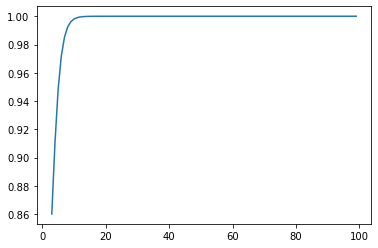

In [29]:
plt.plot(NN,PN1)

Now let's find the probabiltites using qiskit. 

In [ ]:
#!pip install qiskit
import qiskit as qk
from qiskit import IBMQ,Aer
from qiskit import *
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

from qiskit_textbook.tools import simon_oracle
from qiskit.providers.ibmq import least_busy


import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()



Define the circuit to apply the Simone oracle to the superposition of all computational basis states and measure results

In [ ]:
b = '111'
n = len(b)
simon_circuit_2 = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit_2.h(range(n))

# Query oracle
simon_circuit_2 += simon_oracle(b)

# Apply Hadamard gates to the input register
simon_circuit_2.h(range(n))

# Measure qubits
simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw(output='mpl',justify='none')

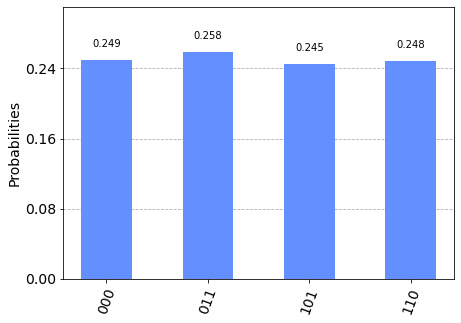

In [17]:
# Execute on the local simulator
qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 2000
job = execute(simon_circuit_2, backend=qasm_simulator, shots=shots, optimization_level=3)

# Get results and plot counts
device_counts = job.result().get_counts()
plot_histogram(device_counts)

Execute on real device (can take long)

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 6 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Execute and monitor the job
from qiskit.tools.monitor import job_monitor
shots = 2000
job = execute(simon_circuit_2, backend=backend, shots=shots, optimization_level=3)
job_monitor(job, interval = 2)

# Get results and plot counts
device_counts = job.result().get_counts()
plot_histogram(device_counts)

C:\Users\Mike\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-11-26 07:39:41,591: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_16_melbourne
Job Status: job is queued (81)    